## preparation

In [1]:
import numpy as np
import networkx as nx
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim


In [ ]:
from func.EI_calculation import tpm_ei
from func.p_calculation import calculate_or_p
from func.p_calculation import calculate_xor_p
from func.p_calculation import noise_modify_p

In [2]:
%run EI_calculation.ipynb

In [3]:
%run p_calculation.ipynb

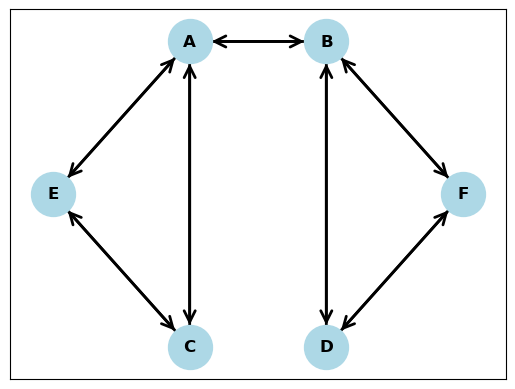

In [4]:
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'E'), ('C', 'E'), ('E', 'C'), ('B', 'D'), 
                  ('D', 'B'), ('D', 'F'), ('F', 'D'), ('B', 'F'), ('E', 'A'), ('F', 'B')])
pos = {'A': (1, 2), 'B': (2, 2), 'C': (1, 0), 'D': (2, 0), 'E': (0, 1), 'F': (3, 1)}
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True, 
                 labels={node: node for node in G.nodes()}, node_size=1000, width=2, arrowstyle='->', arrowsize=20)
plt.show()

# ACE或——BDF异或____噪音递增

In [5]:
ACE_EI_result = {}
BDF_EI_result = {}

In [6]:
ACE_Un_result = {}
BDF_Un_result = {}

In [7]:
ACE_Syn_result = {}
BDF_Syn_result = {}

# ACE

## ACE-0

In [8]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pc = calculate_or_p(i, 1,0,2)
    pe = calculate_or_p(i, 2,0,1)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pc = calculate_or_p(i, 1,0,2)
    pe = calculate_or_p(i, 2,0,1)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_00_ei  中间00代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_00_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_00 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_00_un = tpm_ei(ACE_00, log_base = 2)        #   求Un， 中间00代表噪音水平×100

ACE_00_syn = ACE_00_ei - ACE_00_un              #   求Syn，  中间00代表噪音水平×100

In [9]:
ACE_EI_result['ACE_00_ei'] = ACE_00_ei
ACE_Un_result['ACE_00_un'] = ACE_00_un
ACE_Syn_result['ACE_00_syn'] = ACE_00_syn

## ACE  05噪音

In [10]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.05)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.05)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.05)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.05)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.05)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.05)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_00_ei  中间00代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_05_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_05 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_05_un = tpm_ei(ACE_05, log_base = 2)        #   求Un， 中间00代表噪音水平×100

ACE_05_syn = ACE_05_ei - ACE_05_un              #   求Syn，  中间00代表噪音水平×100

In [11]:
ACE_EI_result['ACE_05_ei'] = ACE_05_ei
ACE_Un_result['ACE_05_un'] = ACE_05_un
ACE_Syn_result['ACE_05_syn'] = ACE_05_syn

## ACE  10噪音

In [12]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.1)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.1)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.1)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_00_ei  中间00代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_10_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_10 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_10_un = tpm_ei(ACE_10, log_base = 2)        #   求Un， 中间00代表噪音水平×100

ACE_10_syn = ACE_10_ei - ACE_10_un              #   求Syn，  中间00代表噪音水平×100

In [13]:
ACE_EI_result['ACE_10_ei'] = ACE_10_ei
ACE_Un_result['ACE_10_un'] = ACE_10_un
ACE_Syn_result['ACE_10_syn'] = ACE_10_syn

## ACE  15噪音

In [14]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.15)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.15)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.15)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.15)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.15)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.15)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_00_ei  中间00代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_15_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_15 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_15_un = tpm_ei(ACE_15, log_base = 2)        #   求Un， 中间00代表噪音水平×100

ACE_15_syn = ACE_15_ei - ACE_15_un              #   求Syn，  中间00代表噪音水平×100

In [15]:
ACE_EI_result['ACE_15_ei'] = ACE_15_ei
ACE_Un_result['ACE_15_un'] = ACE_15_un
ACE_Syn_result['ACE_15_syn'] = ACE_15_syn

## ACE  20噪音

In [16]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.2)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.2)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.2)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.2)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.2)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.2)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_20_ei  中间20代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_20_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_20 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_20_un = tpm_ei(ACE_20, log_base = 2)        #   求Un， 中间20代表噪音水平×100

ACE_20_syn = ACE_20_ei - ACE_20_un              #   求Syn，  中间20代表噪音水平×100

In [17]:
ACE_EI_result['ACE_20_ei'] = ACE_20_ei
ACE_Un_result['ACE_20_un'] = ACE_20_un
ACE_Syn_result['ACE_20_syn'] = ACE_20_syn

## ACE  25噪音

In [18]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.25)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.25)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.25)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.25)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.25)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.25)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_25_ei  中间25代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_25_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_25 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_25_un = tpm_ei(ACE_25, log_base = 2)        #   求Un， 中间25代表噪音水平×100

ACE_25_syn = ACE_25_ei - ACE_25_un              #   求Syn，  中间25代表噪音水平×100

In [19]:
ACE_EI_result['ACE_25_ei'] = ACE_25_ei
ACE_Un_result['ACE_25_un'] = ACE_25_un
ACE_Syn_result['ACE_25_syn'] = ACE_25_syn

## ACE  30噪音

In [20]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.3)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.3)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.3)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.3)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.3)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.3)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_30_ei  中间30代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_30_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_30 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_30_un = tpm_ei(ACE_30, log_base = 2)        #   求Un， 中间30代表噪音水平×100

ACE_30_syn = ACE_30_ei - ACE_30_un              #   求Syn，  中间30代表噪音水平×100

In [21]:
ACE_EI_result['ACE_30_ei'] = ACE_30_ei
ACE_Un_result['ACE_30_un'] = ACE_30_un
ACE_Syn_result['ACE_30_syn'] = ACE_30_syn

## ACE  35噪音

In [22]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.35)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.35)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.35)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.35)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.35)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.35)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_35_ei  中间35代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_35_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_35 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_35_un = tpm_ei(ACE_35, log_base = 2)        #   求Un， 中间35代表噪音水平×100

ACE_35_syn = ACE_35_ei - ACE_35_un              #   求Syn，  中间35代表噪音水平×100

In [23]:
ACE_EI_result['ACE_35_ei'] = ACE_35_ei
ACE_Un_result['ACE_35_un'] = ACE_35_un
ACE_Syn_result['ACE_35_syn'] = ACE_35_syn

## ACE  40噪音

In [24]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.4)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.4)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.4)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.4)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.4)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.4)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_40_ei  中间40代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_40_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_40 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_40_un = tpm_ei(ACE_40, log_base = 2)        #   求Un， 中间40代表噪音水平×100

ACE_40_syn = ACE_40_ei - ACE_40_un              #   求Syn，  中间40代表噪音水平×100

In [25]:
ACE_EI_result['ACE_40_ei'] = ACE_40_ei
ACE_Un_result['ACE_40_un'] = ACE_40_un
ACE_Syn_result['ACE_40_syn'] = ACE_40_syn

## ACE  45噪音

In [26]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.45)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.45)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.45)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.45)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.45)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.45)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_45_ei  中间45代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_45_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_45 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_45_un = tpm_ei(ACE_45, log_base = 2)        #   求Un， 中间45代表噪音水平×100

ACE_45_syn = ACE_45_ei - ACE_45_un              #   求Syn，  中间45代表噪音水平×100

In [27]:
ACE_EI_result['ACE_45_ei'] = ACE_45_ei
ACE_Un_result['ACE_45_un'] = ACE_45_un
ACE_Syn_result['ACE_45_syn'] = ACE_45_syn

## ACE  50噪音

In [28]:
Col = ['{:03b}0'.format(i) for i in range(8)]    # 邻居为0时候矩阵ACE_B_0
ACE_B_0 = np.empty((8, 8))
for i in range(ACE_B_0.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.5)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.5)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.5)
    ACE_B_0[i] = np.kron(pa, np.kron(pc, pe)) 

Col = ['{:03b}1'.format(i) for i in range(8)]    # 邻居为1时候矩阵ACE_B_1
ACE_B_1 = np.empty((8, 8))
for i in range(ACE_B_1.shape[0]):  
    pa = calculate_or_p(i, 0,1,2,3) 
    pa = noise_modify_p(pa, 0.5)
    pc = calculate_or_p(i, 1,0,2)
    pc = noise_modify_p(pc, 0.5)
    pe = calculate_or_p(i, 2,0,1)
    pe = noise_modify_p(pe, 0.5)
    ACE_B_1[i] = np.kron(pa, np.kron(pc, pe))

ACE_B_0_ei = tpm_ei(ACE_B_0, log_base = 2)      #  求EI，ACE_50_ei  中间50代表噪音水平×100
ACE_B_1_ei = tpm_ei(ACE_B_1, log_base = 2)
ACE_50_ei = (ACE_B_0_ei + ACE_B_1_ei) / 2

ACE_50 = np.mean([ACE_B_0, ACE_B_1], axis=0)    #  求对应位置平均的矩阵

ACE_50_un = tpm_ei(ACE_50, log_base = 2)        #   求Un， 中间50代表噪音水平×100

ACE_50_syn = ACE_50_ei - ACE_50_un              #   求Syn，  中间50代表噪音水平×100

In [29]:
ACE_EI_result['ACE_50_ei'] = ACE_50_ei
ACE_Un_result['ACE_50_un'] = ACE_50_un
ACE_Syn_result['ACE_50_syn'] = ACE_50_syn

# BDF

## BDF   00噪音

In [42]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pd = calculate_xor_p(i, 1,0,2)
    pf = calculate_xor_p(i, 2,0,1)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pd = calculate_xor_p(i, 1,0,2)
    pf = calculate_xor_p(i, 2,0,1)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_00_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_00 = np.mean([BDF_A_0, BDF_A_1], axis=0)    #  求对应位置平均的矩阵

BDF_00_un = tpm_ei(BDF_00, log_base = 2)        #   求Un， 中间00代表噪音水平×100

BDF_00_syn = BDF_00_ei - BDF_00_un              #   求Syn，  中间00代表噪音水平×100


In [43]:
BDF_EI_result['BDF_00_ei'] = BDF_00_ei
BDF_Un_result['BDF_00_un'] = BDF_00_un
BDF_Syn_result['BDF_00_syn'] = BDF_00_syn

## BDF  05噪音

In [44]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.05)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.05)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.05)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.05)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.05)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.05)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_05_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_05 = np.mean([BDF_A_0, BDF_A_1], axis=0)    #  求对应位置平均的矩阵

BDF_05_un = tpm_ei(BDF_05, log_base = 2)        #   求Un， 中间00代表噪音水平×100

BDF_05_syn = BDF_05_ei - BDF_05_un              #   求Syn，  中间00代表噪音水平×100


In [45]:
BDF_EI_result['BDF_05_ei'] = BDF_05_ei
BDF_Un_result['BDF_05_un'] = BDF_05_un
BDF_Syn_result['BDF_05_syn'] = BDF_05_syn

## BDF  10噪音

In [46]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.1)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.1)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.1)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.1)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.1)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.1)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_10_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_10 = np.mean([BDF_A_0, BDF_A_1], axis=0)    #  求对应位置平均的矩阵

BDF_10_un = tpm_ei(BDF_10, log_base = 2)        #   求Un， 中间00代表噪音水平×100

BDF_10_syn = BDF_10_ei - BDF_10_un              #   求Syn，  中间00代表噪音水平×100


In [47]:
BDF_EI_result['BDF_10_ei'] = BDF_10_ei
BDF_Un_result['BDF_10_un'] = BDF_10_un
BDF_Syn_result['BDF_10_syn'] = BDF_10_syn

##  BDF  15噪音

In [48]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.15)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.15)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.15)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.15)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.15)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.15)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_15_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_15 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_15_un = tpm_ei(BDF_15, log_base = 2)        

BDF_15_syn = BDF_15_ei - BDF_15_un            


In [49]:
BDF_EI_result['BDF_15_ei'] = BDF_15_ei
BDF_Un_result['BDF_15_un'] = BDF_15_un
BDF_Syn_result['BDF_15_syn'] = BDF_15_syn

##  BDF  20噪音

In [50]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.2)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.2)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.2)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.2)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.2)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.2)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_20_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_20 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_20_un = tpm_ei(BDF_20, log_base = 2)        

BDF_20_syn = BDF_20_ei - BDF_20_un            

In [51]:
BDF_EI_result['BDF_20_ei'] = BDF_20_ei
BDF_Un_result['BDF_20_un'] = BDF_20_un
BDF_Syn_result['BDF_20_syn'] = BDF_20_syn

## BDF  25噪音

In [52]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.25)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.25)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.25)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.25)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.25)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.25)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_25_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_25 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_25_un = tpm_ei(BDF_25, log_base = 2)        

BDF_25_syn = BDF_25_ei - BDF_25_un            

In [53]:
BDF_EI_result['BDF_25_ei'] = BDF_25_ei
BDF_Un_result['BDF_25_un'] = BDF_25_un
BDF_Syn_result['BDF_25_syn'] = BDF_25_syn

##  BDF  30噪音

In [54]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.3)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.3)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.3)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.3)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.3)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.3)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_30_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_30 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_30_un = tpm_ei(BDF_30, log_base = 2)        

BDF_30_syn = BDF_30_ei - BDF_30_un            

In [55]:
BDF_EI_result['BDF_30_ei'] = BDF_30_ei
BDF_Un_result['BDF_30_un'] = BDF_30_un
BDF_Syn_result['BDF_30_syn'] = BDF_30_syn

##  BDF  35噪音

In [56]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.35)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.35)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.35)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.35)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.35)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.35)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_35_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_35 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_35_un = tpm_ei(BDF_35, log_base = 2)        

BDF_35_syn = BDF_35_ei - BDF_35_un            

In [57]:
BDF_EI_result['BDF_35_ei'] = BDF_35_ei
BDF_Un_result['BDF_35_un'] = BDF_35_un
BDF_Syn_result['BDF_35_syn'] = BDF_35_syn

##  BDF  40噪音

In [58]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.4)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.4)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.4)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.4)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.4)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.4)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_40_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_40 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_40_un = tpm_ei(BDF_40, log_base = 2)        

BDF_40_syn = BDF_40_ei - BDF_40_un            

In [59]:
BDF_EI_result['BDF_40_ei'] = BDF_40_ei
BDF_Un_result['BDF_40_un'] = BDF_40_un
BDF_Syn_result['BDF_40_syn'] = BDF_40_syn

##  BDF  45噪音

In [60]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.45)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.45)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.45)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.45)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.45)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.45)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_45_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_45 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_45_un = tpm_ei(BDF_45, log_base = 2)        

BDF_45_syn = BDF_45_ei - BDF_45_un            

In [61]:
BDF_EI_result['BDF_45_ei'] = BDF_45_ei
BDF_Un_result['BDF_45_un'] = BDF_45_un
BDF_Syn_result['BDF_45_syn'] = BDF_45_syn

##  BDF  50噪音

In [62]:
Col = ['{:03b}0'.format(i) for i in range(8)]
BDF_A_0 = np.empty((8, 8))
for i in range(BDF_A_0.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.5)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.5)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.5)
    BDF_A_0[i] = np.kron(pb, np.kron(pd, pf))

Col = ['{:03b}1'.format(i) for i in range(8)]
BDF_A_1 = np.empty((8, 8))
for i in range(BDF_A_1.shape[0]):  
    pb = calculate_xor_p(i, 0,1,2,3)  
    pb = noise_modify_p(pb, 0.5)
    pd = calculate_xor_p(i, 1,0,2)
    pd = noise_modify_p(pd, 0.5)
    pf = calculate_xor_p(i, 2,0,1)
    pf = noise_modify_p(pf, 0.5)
    BDF_A_1[i] = np.kron(pb, np.kron(pd, pf))

BDF_A_0_ei = tpm_ei(BDF_A_0, log_base = 2)
BDF_A_1_ei = tpm_ei(BDF_A_1, log_base = 2)
BDF_50_ei = (BDF_A_0_ei + BDF_A_1_ei) / 2

BDF_50 = np.mean([BDF_A_0, BDF_A_1], axis=0)   

BDF_50_un = tpm_ei(BDF_50, log_base = 2)        

BDF_50_syn = BDF_50_ei - BDF_50_un            

In [63]:
BDF_EI_result['BDF_50_ei'] = BDF_50_ei
BDF_Un_result['BDF_50_un'] = BDF_50_un
BDF_Syn_result['BDF_50_syn'] = BDF_50_syn

# RESULT

In [64]:
ACE_EI_result

{'ACE_00_ei': np.float64(0.5435644431995963),
 'ACE_05_ei': np.float64(0.4936670514940149),
 'ACE_10_ei': np.float64(0.4223306877018532),
 'ACE_15_ei': np.float64(0.3430316299152504),
 'ACE_20_ei': np.float64(0.26329409592036856),
 'ACE_25_ei': np.float64(0.18863155256154862),
 'ACE_30_ei': np.float64(0.1232598649376336),
 'ACE_35_ei': np.float64(0.07021928699836523),
 'ACE_40_ei': np.float64(0.03142649469423181),
 'ACE_45_ei': np.float64(0.007882364755833171),
 'ACE_50_ei': np.float64(0.0)}

In [65]:
BDF_EI_result

{'BDF_00_ei': np.float64(1.0),
 'BDF_05_ei': np.float64(0.9574151107679586),
 'BDF_10_ei': np.float64(0.8624177306350442),
 'BDF_15_ei': np.float64(0.7365158168178878),
 'BDF_20_ei': np.float64(0.5938432516792699),
 'BDF_25_ei': np.float64(0.4464064415667493),
 'BDF_30_ei': np.float64(0.30532577044931636),
 'BDF_35_ei': np.float64(0.18117479366247896),
 'BDF_40_ei': np.float64(0.08377202771535712),
 'BDF_45_ei': np.float64(0.02146165165251085),
 'BDF_50_ei': np.float64(0.0)}

In [66]:
ACE_Un_result

{'ACE_00_un': np.float64(0.5435644431995963),
 'ACE_05_un': np.float64(0.48494919117651836),
 'ACE_10_un': np.float64(0.40706815278210534),
 'ACE_15_un': np.float64(0.32505814303315883),
 'ACE_20_un': np.float64(0.24586645273889238),
 'ACE_25_un': np.float64(0.17400077219193066),
 'ACE_30_un': np.float64(0.11260350502094206),
 'ACE_35_un': np.float64(0.06369850019166878),
 'ACE_40_un': np.float64(0.028377684212415426),
 'ACE_45_un': np.float64(0.007099768066528802),
 'ACE_50_un': np.float64(0.0)}

In [67]:
BDF_Un_result

{'BDF_00_un': np.float64(1.0),
 'BDF_05_un': np.float64(0.880148633955371),
 'BDF_10_un': np.float64(0.7420858585497175),
 'BDF_15_un': np.float64(0.5994265703948821),
 'BDF_20_un': np.float64(0.4605252679497692),
 'BDF_25_un': np.float64(0.3318777540066993),
 'BDF_30_un': np.float64(0.21887209657226814),
 'BDF_35_un': np.float64(0.12601306072991098),
 'BDF_40_un': np.float64(0.05694434708586456),
 'BDF_45_un': np.float64(0.014378956070044913),
 'BDF_50_un': np.float64(0.0)}

In [68]:
ACE_Syn_result

{'ACE_00_syn': np.float64(0.0),
 'ACE_05_syn': np.float64(0.00871786031749655),
 'ACE_10_syn': np.float64(0.015262534919747883),
 'ACE_15_syn': np.float64(0.01797348688209155),
 'ACE_20_syn': np.float64(0.017427643181476188),
 'ACE_25_syn': np.float64(0.014630780369617957),
 'ACE_30_syn': np.float64(0.010656359916691546),
 'ACE_35_syn': np.float64(0.006520786806696446),
 'ACE_40_syn': np.float64(0.0030488104818163844),
 'ACE_45_syn': np.float64(0.0007825966893043696),
 'ACE_50_syn': np.float64(0.0)}

In [69]:
BDF_Syn_result

{'BDF_00_syn': np.float64(0.0),
 'BDF_05_syn': np.float64(0.07726647681258758),
 'BDF_10_syn': np.float64(0.1203318720853267),
 'BDF_15_syn': np.float64(0.13708924642300568),
 'BDF_20_syn': np.float64(0.13331798372950066),
 'BDF_25_syn': np.float64(0.11452868756005002),
 'BDF_30_syn': np.float64(0.08645367387704822),
 'BDF_35_syn': np.float64(0.055161732932567986),
 'BDF_40_syn': np.float64(0.026827680629492562),
 'BDF_45_syn': np.float64(0.0070826955824659366),
 'BDF_50_syn': np.float64(0.0)}

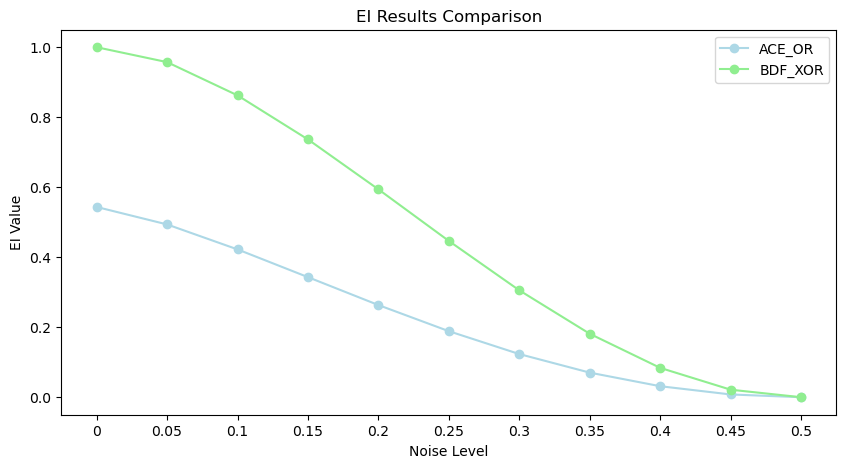

In [78]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(ACE_EI_result.keys())
y_values_ACE = list(ACE_EI_result.values())
y_values_BDF = list(BDF_EI_result.values())

plt.figure(figsize=(10, 5))
plt.plot(x_labels, y_values_ACE, label='ACE_OR', color='lightblue', marker='o')
plt.plot(x_labels, y_values_BDF, label='BDF_XOR', color='lightgreen', marker='o')

plt.title('EI Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('EI Value')
plt.legend()

plt.show()

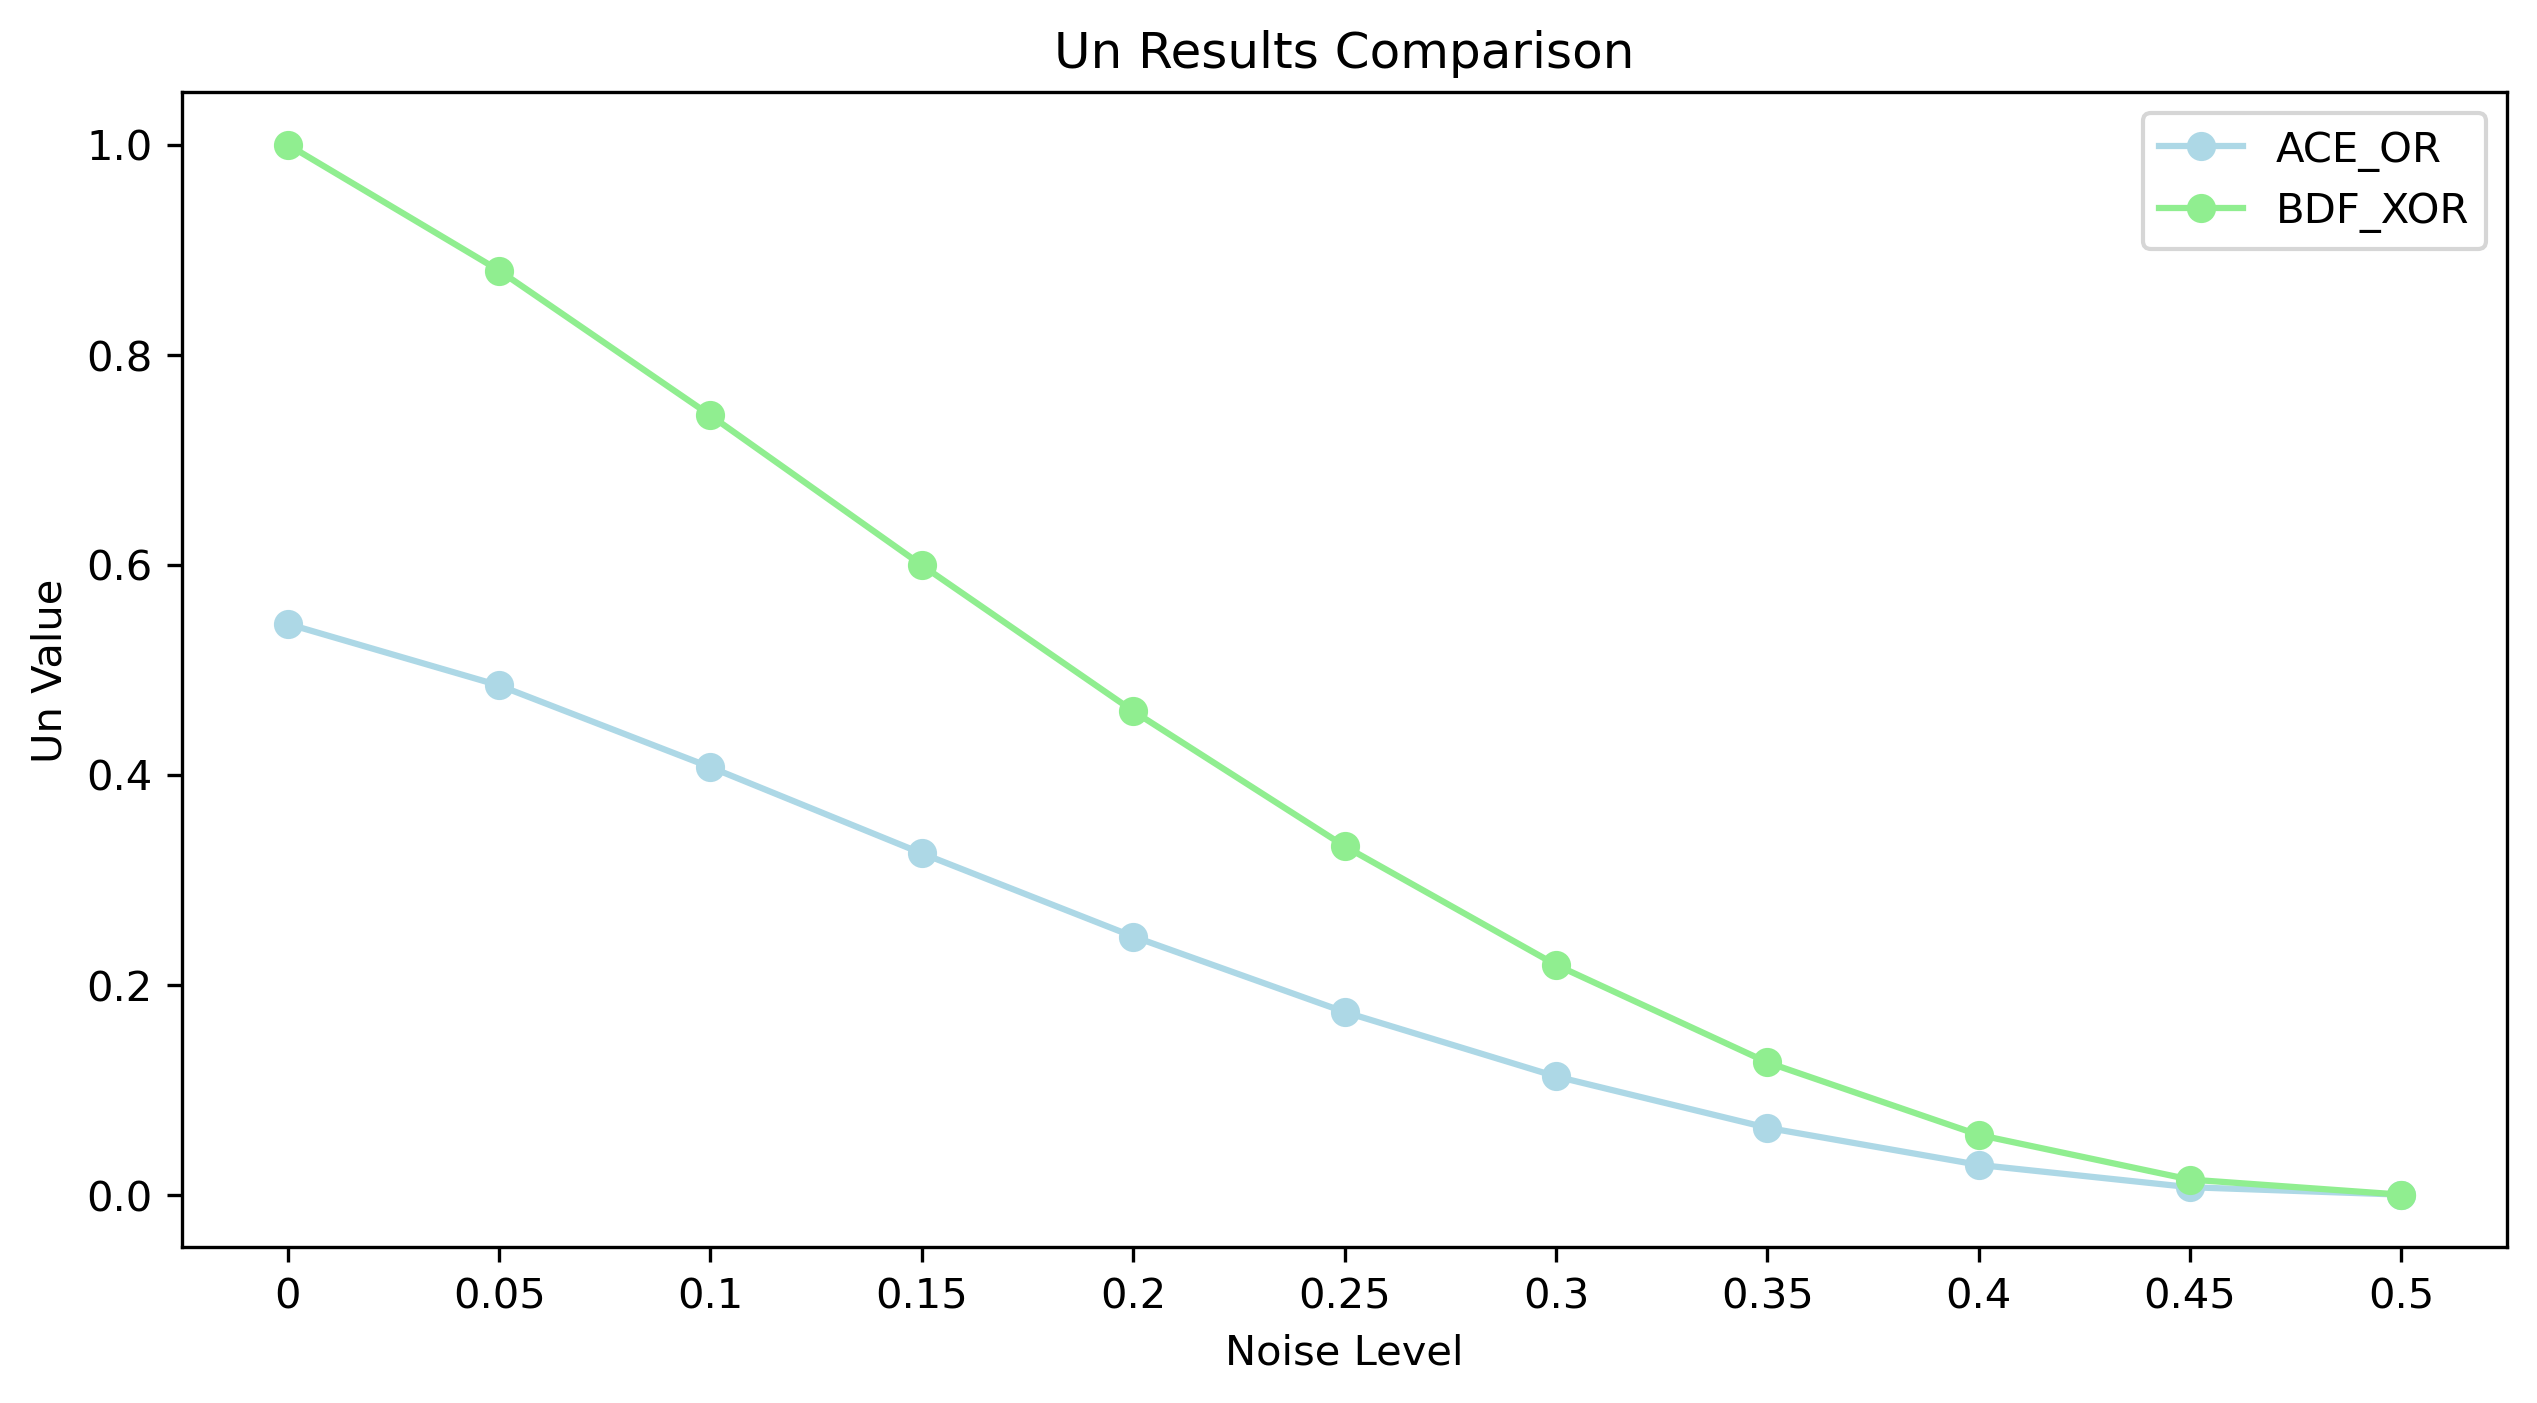

In [79]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(ACE_EI_result.keys())
y_values_ACE = list(ACE_Un_result.values())
y_values_BDF = list(BDF_Un_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_ACE, label='ACE_OR', color='lightblue', marker='o')
plt.plot(x_labels, y_values_BDF, label='BDF_XOR', color='lightgreen', marker='o')

plt.title('Un Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Un Value')
plt.legend()

plt.show()

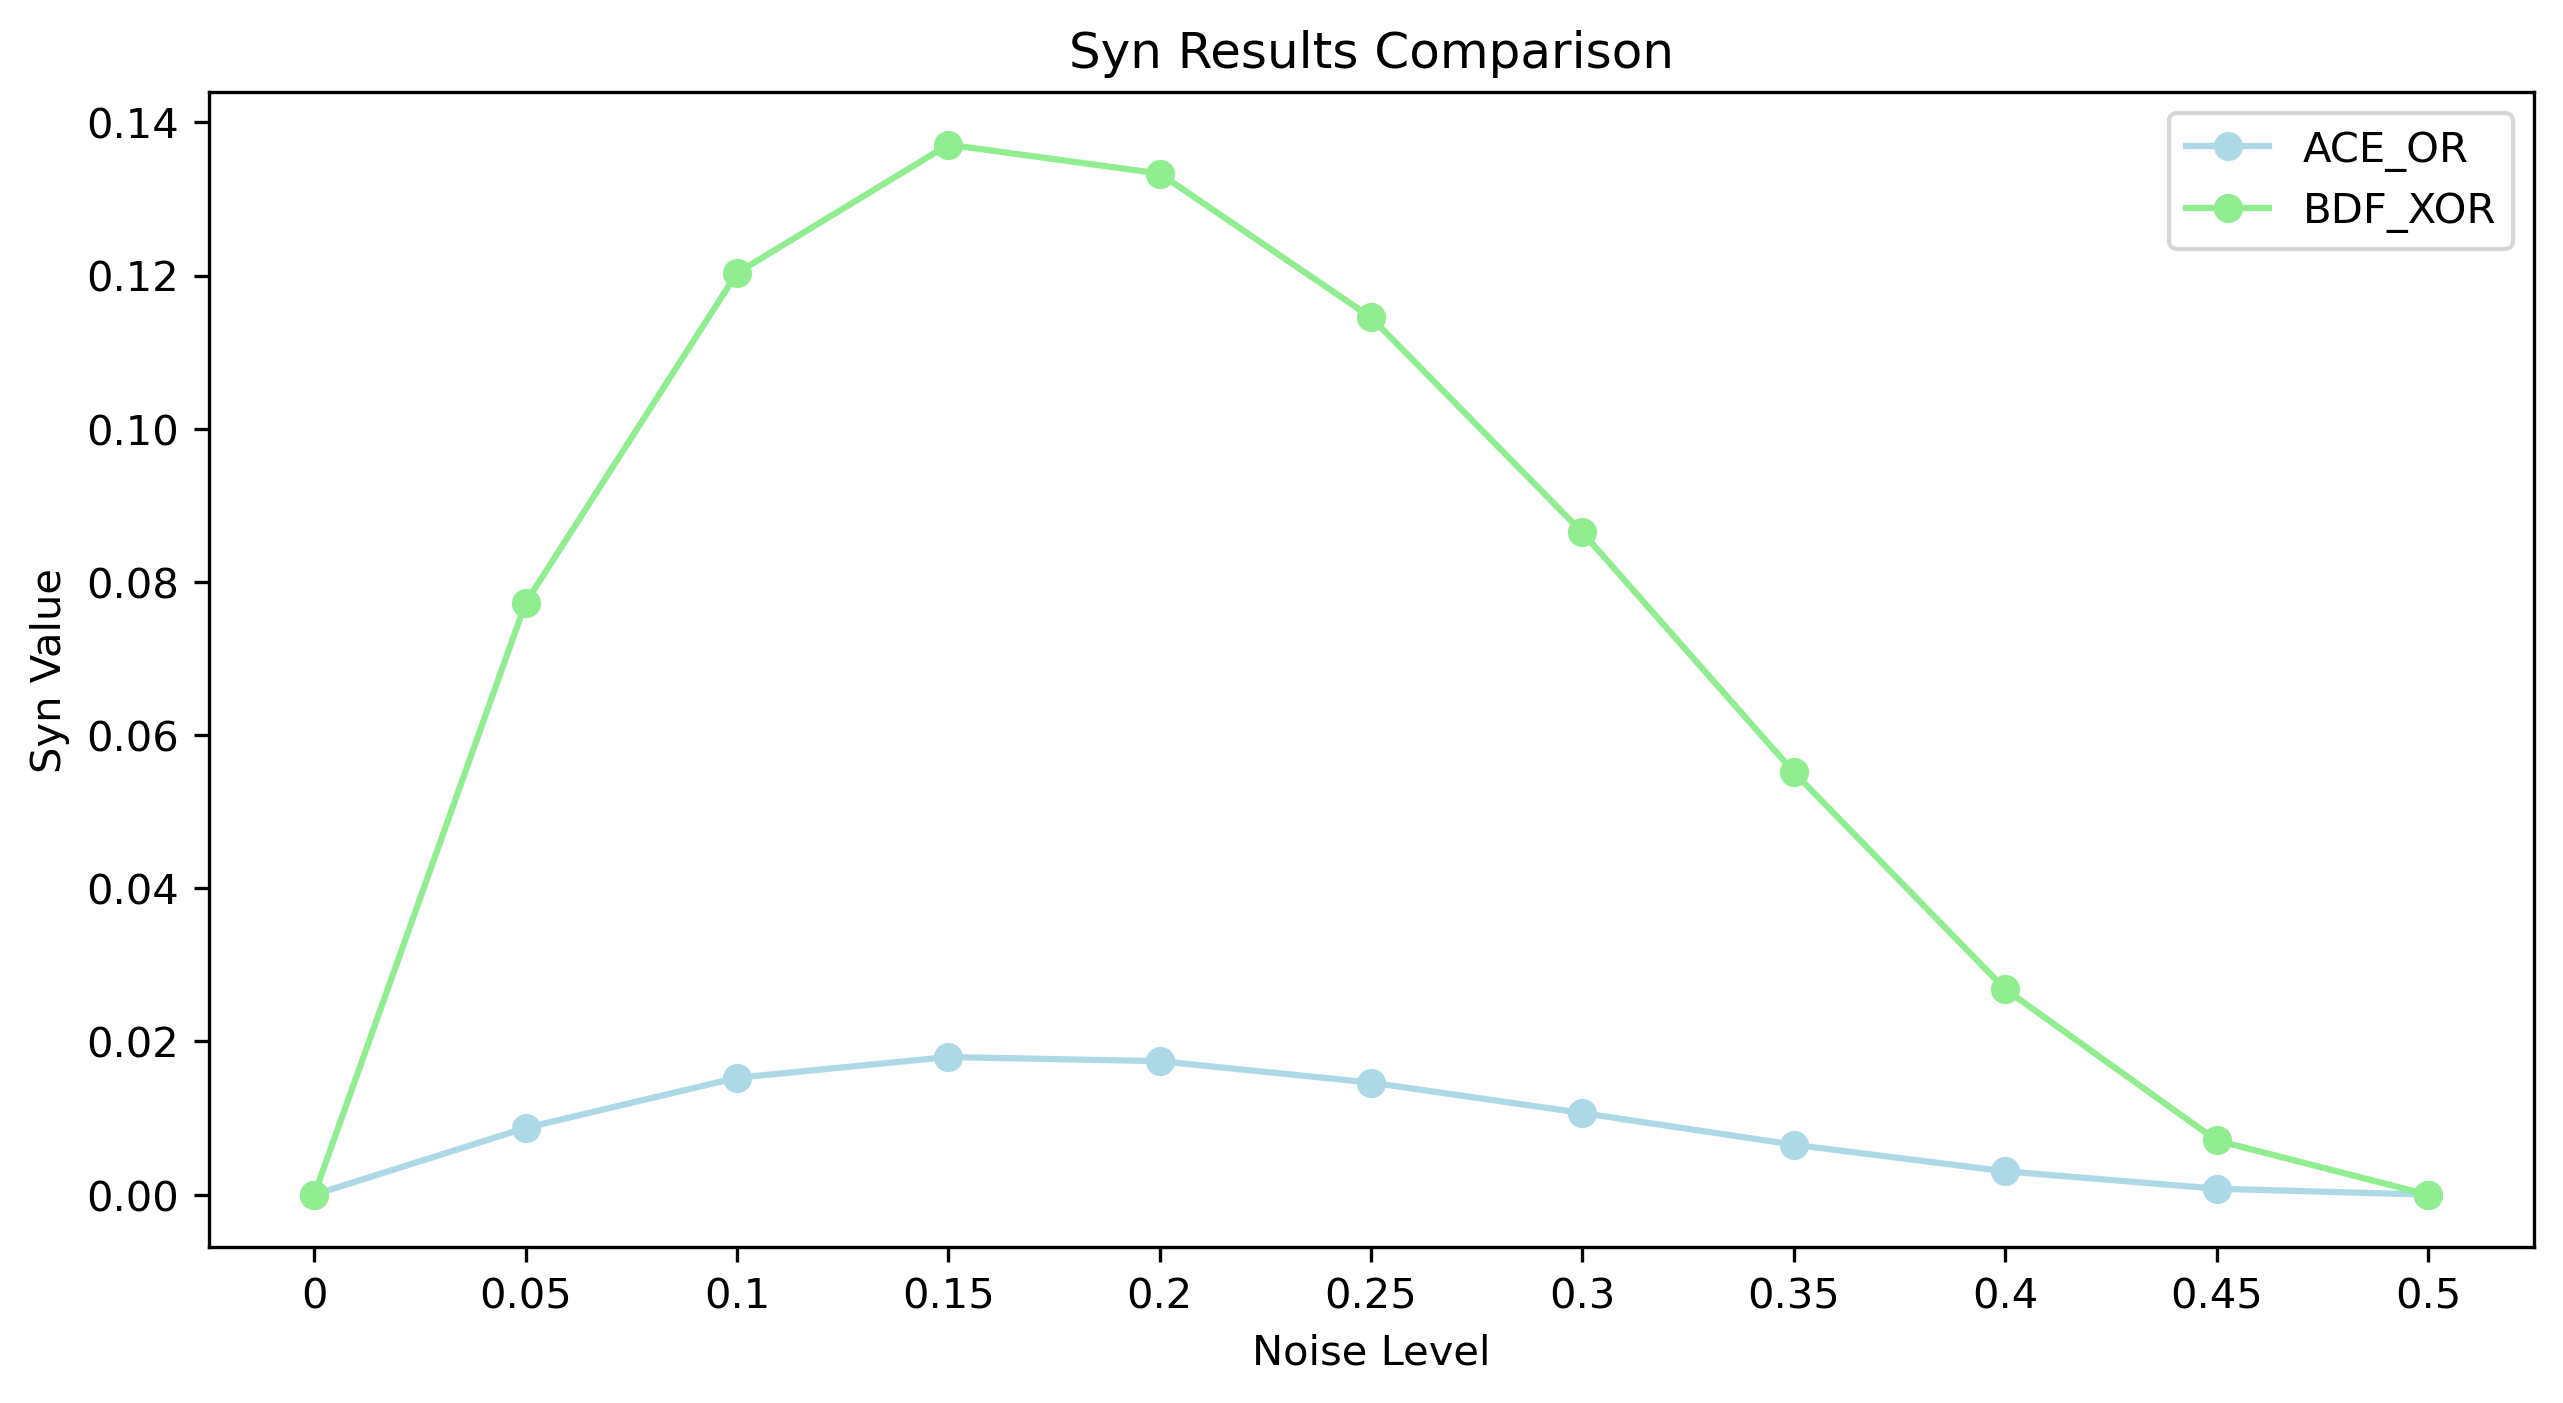

In [80]:
x_labels = ["0", "0.05", "0.1", "0.15", "0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]

x_values = list(ACE_EI_result.keys())
y_values_ACE = list(ACE_Syn_result.values())
y_values_BDF = list(BDF_Syn_result.values())

plt.figure(figsize=(10, 5), dpi=300)
plt.plot(x_labels, y_values_ACE, label='ACE_OR', color='lightblue', marker='o')
plt.plot(x_labels, y_values_BDF, label='BDF_XOR', color='lightgreen', marker='o')

plt.title('Syn Results Comparison')
plt.xlabel('Noise Level')
plt.ylabel('Syn Value')
plt.legend()

plt.show()